#Necessary packages

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import numpy as np
import joblib
import kagglehub

#Downloading Dataset from kaggle

In [15]:
# Download latest version
path = kagglehub.dataset_download("zeyadkhalid/mbti-personality-types-500-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1


In [16]:
cd /root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1

/root/.cache/kagglehub/datasets/zeyadkhalid/mbti-personality-types-500-dataset/versions/1


In [17]:
ls

'MBTI 500.csv'


#Data Preparation

In [18]:
df=pd.read_csv(path+'/MBTI 500.csv')

In [19]:
print(df.head())
print(df.shape)

                                               posts  type
0  know intj tool use interaction people excuse a...  INTJ
1  rap music ehh opp yeah know valid well know fa...  INTJ
2  preferably p hd low except wew lad video p min...  INTJ
3  drink like wish could drink red wine give head...  INTJ
4  space program ah bad deal meing freelance max ...  INTJ
(106067, 2)


In [20]:
mbti_counts = df['type'].value_counts()

In [21]:
print(mbti_counts)

type
INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: count, dtype: int64


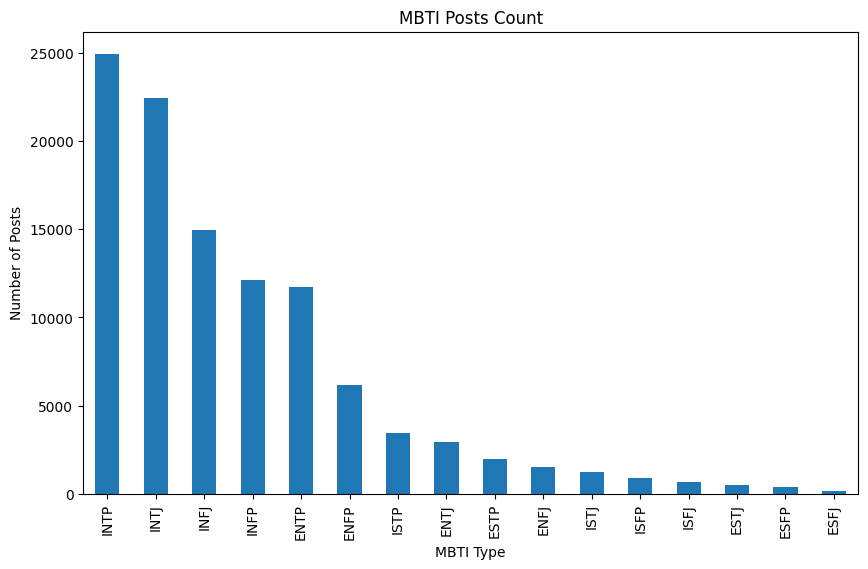

In [22]:
plt.figure(figsize=(10, 6))
mbti_counts.plot(kind='bar')
plt.title('MBTI Posts Count')
plt.xlabel('MBTI Type')
plt.ylabel('Number of Posts')
plt.show()

In [23]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['posts'])

# Encode the MBTI personality types into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])

In [24]:
# Display the mapping of classes
class_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}
print("Class Mapping:", class_mapping)

Class Mapping: {0: 'ENFJ', 1: 'ENFP', 2: 'ENTJ', 3: 'ENTP', 4: 'ESFJ', 5: 'ESFP', 6: 'ESTJ', 7: 'ESTP', 8: 'INFJ', 9: 'INFP', 10: 'INTJ', 11: 'INTP', 12: 'ISFJ', 13: 'ISFP', 14: 'ISTJ', 15: 'ISTP'}


In [25]:
# splitting to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training

In [26]:

# training classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# prediction and evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.68
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       319
           1       0.86      0.43      0.58      1249
           2       0.94      0.20      0.33       577
           3       0.77      0.58      0.66      2324
           4       0.00      0.00      0.00        33
           5       0.00      0.00      0.00        75
           6       0.95      0.59      0.73       105
           7       0.94      0.63      0.75       398
           8       0.67      0.73      0.70      2954
           9       0.74      0.66      0.70      2391
          10       0.65      0.83      0.73      4531
          11       0.63      0.88      0.74      5033
          12       0.00      0.00      0.00       132
          13       0.00      0.00      0.00       161
          14       0.00      0.00      0.00       253
          15       0.89      0.32      0.47       679

    accuracy                           0.68     21214
   macro av

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Predict on new samples
def predict_mbti(personality_text):
    cleaned = (personality_text)
    features = vectorizer.transform([cleaned])
    prediction = model.predict(features)[0]
    probabilities = model.predict_proba(features)[0]
    confidence = max(probabilities)
    return prediction, confidence

In [28]:
#prediction with new input
predict_mbti("I love deep conversations and thinking about abstract ideas.")

(10, 0.36)

#Saving model, encoding and vectorication

In [29]:
# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
#Save the trained model
joblib.dump(model, 'mbti_classifier.joblib')
# save the label encoder
joblib.dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']

In [30]:
# Download the joblib file
files.download('mbti_classifier.joblib')
files.download('tfidf_vectorizer.joblib')
files.download('label_encoder.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>